Problem 1

Text(0.5, 1.0, 'mask 7')

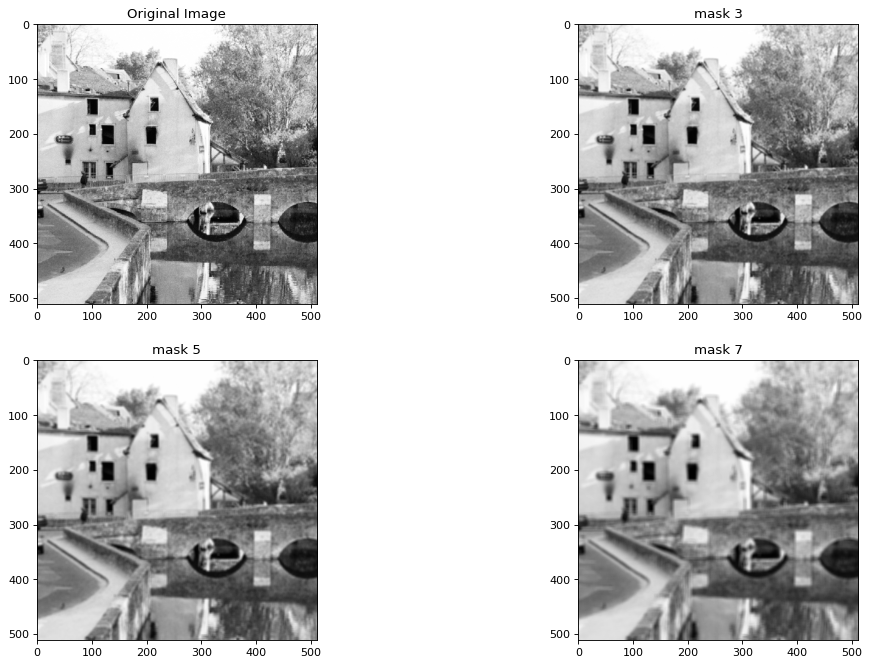

In [13]:
# i

import cv2 
import math
import numpy as np
import matplotlib.pyplot as plt

# Reading
img0 = plt.imread('bridge.gif')

fig = plt.figure(figsize=(16, 10), dpi=80)
(ax1, ax2), (ax3, ax4) = fig.subplots(2, 2)

# original
ax1.imshow(img0, cmap='gray')
ax1.set_title('Original Image')

# mask 3 * 3
mask3 = np.ones((3, 3), np.float32) / 9
img_b_3 = cv2.filter2D(src=img0, ddepth=-1, kernel=mask3)
ax2.imshow(img_b_3, cmap='gray')
ax2.set_title('mask 3')

# mask 5 * 5
mask5 = np.ones((5, 5), np.float32) / 25
img_b_5 = cv2.filter2D(src=img0, ddepth=-1, kernel=mask5)
ax3.imshow(img_b_5, cmap='gray')
ax3.set_title('mask 5')

# mask 7 * 7
mask7 = np.ones((7, 7), np.float32) / 49
img_b_7 = cv2.filter2D(src=img0, ddepth=-1, kernel=mask7)
ax4.imshow(img_b_7, cmap='gray')
ax4.set_title('mask 7')

# the best result is come out from the filter of 3 in my opinion.
# it provides a great balance between noise reduction and image bluring
# other filters are also working well in noise reduction, but suck in 
# blurring, cause the image too much blurry

Text(0.5, 1.0, 'sharpen with laplacian')

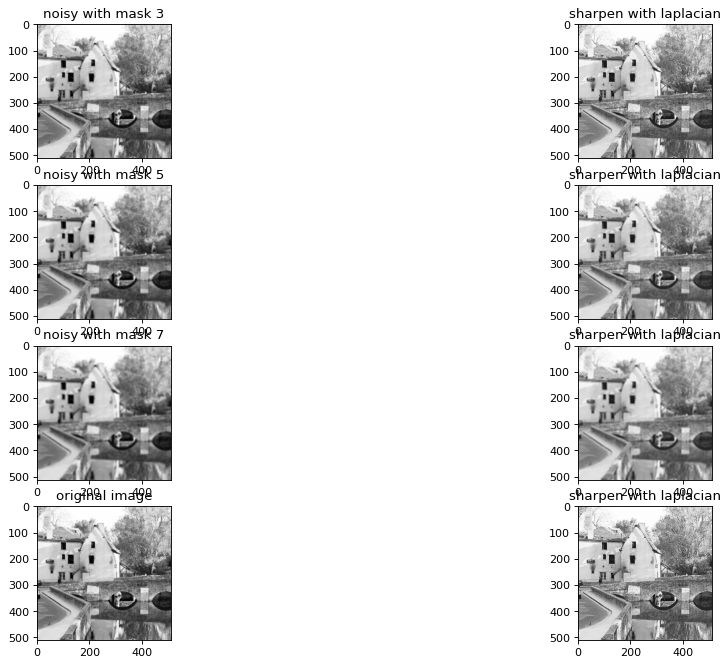

In [24]:
# ii
# need the previous cell to run

fig = plt.figure(figsize=(16, 10), dpi=80)
(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8) = fig.subplots(4, 2)

lap_mask = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

sharp1 = cv2.filter2D(src=img_b_3, ddepth=-1, kernel=lap_mask)
sharp2 = cv2.filter2D(src=img_b_5, ddepth=-1, kernel=lap_mask)
sharp3 = cv2.filter2D(src=img_b_7, ddepth=-1, kernel=lap_mask)

ax1.imshow(img_b_3, cmap='gray')
ax1.set_title('noisy with mask 3')
ax2.imshow(sharp1, cmap='gray')
ax2.set_title('sharpen with laplacian')

ax3.imshow(img_b_5, cmap='gray')
ax3.set_title('noisy with mask 5')
ax4.imshow(sharp2, cmap='gray')
ax4.set_title('sharpen with laplacian')

ax5.imshow(img_b_7, cmap='gray')
ax5.set_title('noisy with mask 7')
ax6.imshow(sharp3, cmap='gray')
ax6.set_title('sharpen with laplacian')

ax7.imshow(img0, cmap='gray')
ax7.set_title('original image')
ax8.imshow(cv2.filter2D(src=img0, ddepth=-1, kernel=lap_mask), cmap='gray')
ax8.set_title('sharpen with laplacian')

# this operation is reducing the noise of the images, altough for the ones
# with too much noise, it can not completely reduce the amount of noise.
# for the original image, this action performs a pleasent noise reduction
# and make the image sharpen


Text(0.5, 1.0, 'sharpen again with laplacian')

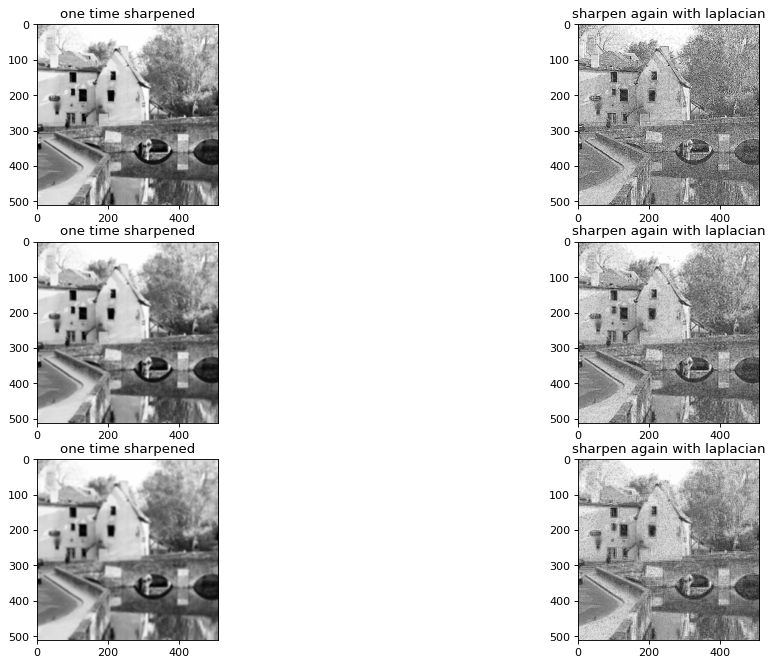

In [29]:
# iii
# need the previous cell to run

import cv2 
import math
import numpy as np
import matplotlib.pyplot as plt

# Reading
img5 = plt.imread('bridge2.gif')

fig = plt.figure(figsize=(16, 10), dpi=80)
(ax1, ax2), (ax3, ax4), (ax5, ax6) = fig.subplots(3, 2)

lap_mask = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

sharp1 = cv2.filter2D(src=sharp1, ddepth=-1, kernel=lap_mask)
sharp2 = cv2.filter2D(src=sharp2, ddepth=-1, kernel=lap_mask)
sharp3 = cv2.filter2D(src=sharp3, ddepth=-1, kernel=lap_mask)

ax1.imshow(img_b_3, cmap='gray')
ax1.set_title('one time sharpened')
ax2.imshow(sharp1, cmap='gray')
ax2.set_title('sharpen again with laplacian')

ax3.imshow(img_b_5, cmap='gray')
ax3.set_title('one time sharpened')
ax4.imshow(sharp2, cmap='gray')
ax4.set_title('sharpen again with laplacian')

ax5.imshow(img_b_7, cmap='gray')
ax5.set_title('one time sharpened')
ax6.imshow(sharp3, cmap='gray')
ax6.set_title('sharpen again with laplacian')

# reapplying the laplacian nosie reduction filter will affect the 
# images and sharpen the images more


Problem 3

Text(0.5, 1.0, 'filtered 15')

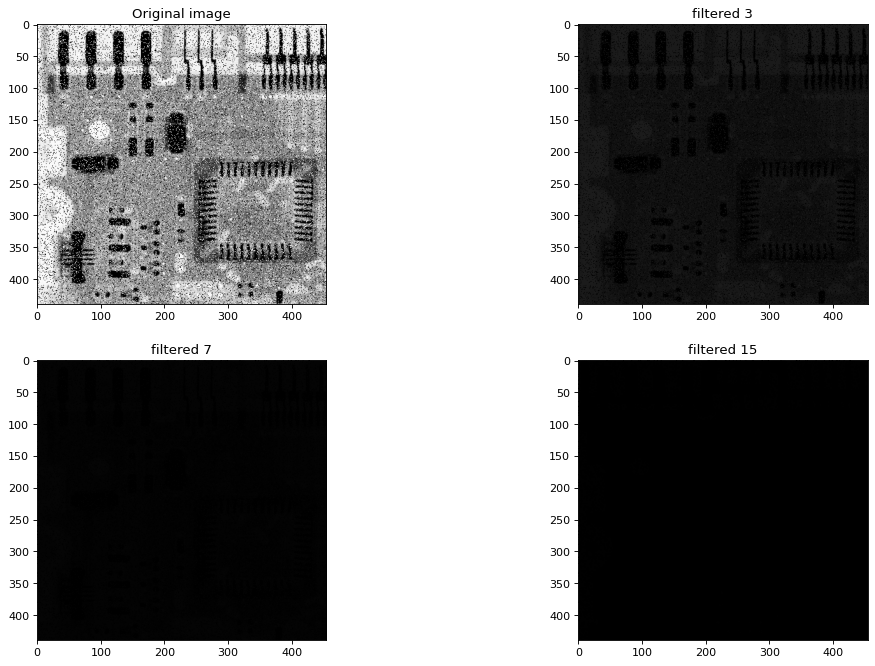

In [58]:
# a
import cv2 
import math
import numpy as np
import matplotlib.pyplot as plt


def med_filter(arr, _size):
    v1, v2 = arr.shape
    s1 = _size * _size
    s2 = round(_size / 2)
    s4 = s2 * 2
    s3 = round((s1/2) + 1)
    
    arr2 = np.zeros((v1 + s4, v2 + s4))
    arr2[s2:v1+s2, s2:v2+s2] = arr
    res = np.array(arr.copy())
    
    for row in range(s2+1, v1+s2):
        for col in range(s2+1, v2+s2):
            t = np.zeros((s1, s1))
            c = 0
            for _r in range(row-s2, row+s2-1):
                for _c in range(col-s2, col+s2-1):
                    t[c] = arr2[_r, _c]
                    c += 1
            
            t.sort()
            mid = t[s3].mean() / len(t[s3])
            res[row-s2, col-s2] = mid
            
    return res



# Reading
img6 = plt.imread('Q2.tif')
fig = plt.figure(figsize=(16, 10), dpi=80)
(ax1, ax2), (ax3, ax4) = fig.subplots(2, 2)

ax1.imshow(img6, cmap='gray')
ax1.set_title('Original image')

f1 = med_filter(img6, 3)
ax2.imshow(f1, cmap='gray')
ax2.set_title('filtered 3')

f2 = med_filter(img6, 7)
ax3.imshow(f2, cmap='gray')
ax3.set_title('filtered 7')

f3 = med_filter(img6, 15)
ax4.imshow(f3, cmap='gray')
ax4.set_title('filtered 15')
# this run can take up to 4 minutes to finish



Problem 3

Text(0.5, 1.0, 'diff sobel')

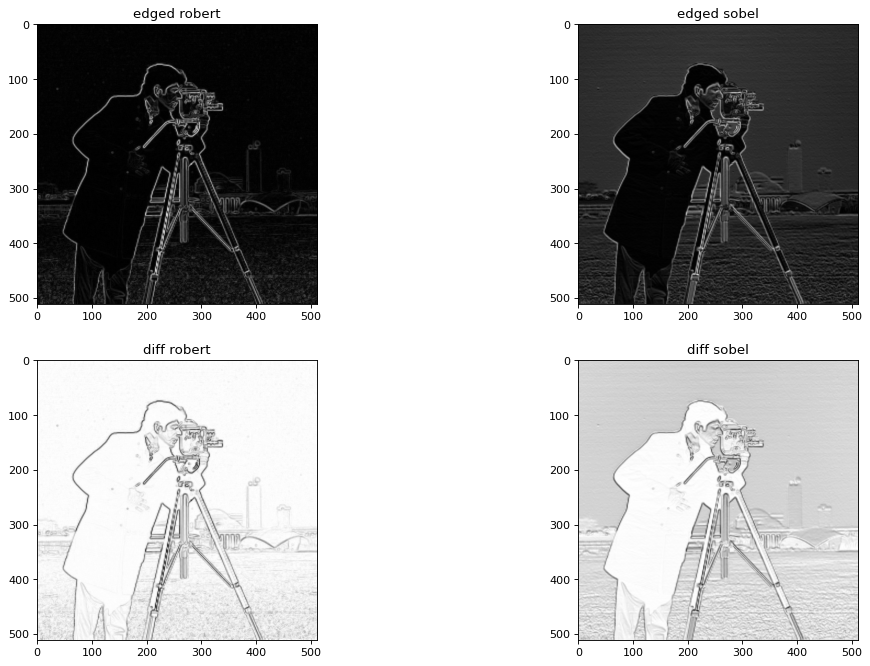

In [68]:
# a - i

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Reading
img8 = plt.imread('cameraman.gif').astype('float64') / 255.0

fig = plt.figure(figsize=(16, 10), dpi=80)
(ax1, ax2), (ax3, ax4) = fig.subplots(2, 2)

roberts_cross_v = np.array([[1, 0], [0, -1]])
roberts_cross_h = np.array([[0, 1], [-1, 0]])

robert_vertical = cv2.filter2D(src=img8, ddepth=-1, kernel=roberts_cross_v)
robert_horizontal = cv2.filter2D(src=img8, ddepth=-1, kernel=roberts_cross_h)

edged_img_robert = np.sqrt(np.square(robert_horizontal) + np.square(robert_vertical))
edged_img_robert *= 255

ax1.imshow(edged_img_robert, cmap='gray')
ax1.set_title('edged robert')


sobel_v = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_h = np.array([[1, 2, 1], [-1, 0, 0], [-1, -2, -1]])

sobel_vertical = cv2.filter2D(src=img8, ddepth=-1, kernel=sobel_v)
sobel_horizontal = cv2.filter2D(src=img8, ddepth=-1, kernel=sobel_h)

edged_img_sobel = np.sqrt(np.square(sobel_horizontal) + np.square(sobel_vertical))
edged_img_sobel *= 255

ax2.imshow(edged_img_sobel, cmap='gray')
ax2.set_title('edged sobel')

diff_sobel = img8 - edged_img_sobel
diff_robert = img8 - edged_img_robert

ax3.imshow(diff_robert, cmap='gray')
ax3.set_title('diff robert')

ax4.imshow(diff_sobel, cmap='gray')
ax4.set_title('diff sobel')

# in these operations, robert filter work much better than sobel
# in edge detection
# also in differences, it is also better and clearer with robert

Text(0.5, 1.0, 'diff sobel')

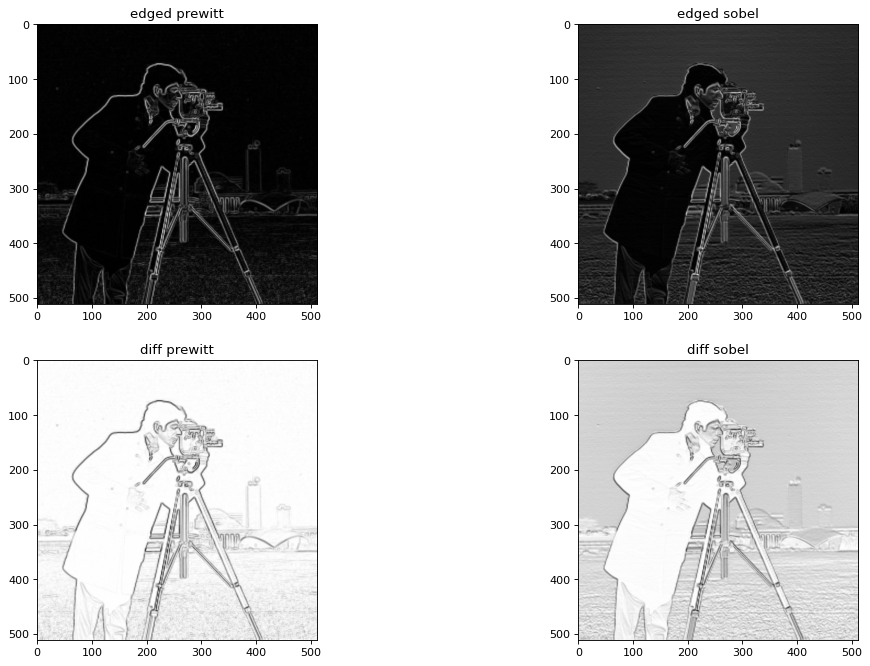

In [70]:
# b - i

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

# Reading
img9 = plt.imread('cameraman.gif').astype('float64') / 255.0

fig = plt.figure(figsize=(16, 10), dpi=80)
(ax1, ax2), (ax3, ax4) = fig.subplots(2, 2)

prewitt_v = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_h = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewitt_vertical = cv2.filter2D(src=img9, ddepth=-1, kernel=prewitt_v)
prewitt_horizontal = cv2.filter2D(src=img9, ddepth=-1, kernel=prewitt_h)

edged_img_prewitt = np.sqrt(np.square(prewitt_horizontal) + np.square(prewitt_vertical))
edged_img_prewitt *= 255

ax1.imshow(edged_img_prewitt, cmap='gray')
ax1.set_title('edged prewitt')

# sobel
sobel_v = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_h = np.array([[1, 2, 1], [-1, 0, 0], [-1, -2, -1]])

sobel_vertical = cv2.filter2D(src=img9, ddepth=-1, kernel=sobel_v)
sobel_horizontal = cv2.filter2D(src=img9, ddepth=-1, kernel=sobel_h)

edged_img_sobel = np.sqrt(np.square(sobel_horizontal) + np.square(sobel_vertical))
edged_img_sobel *= 255

ax2.imshow(edged_img_sobel, cmap='gray')
ax2.set_title('edged sobel')

diff_sobel = img9 - edged_img_sobel
diff_prewitt = img9 - edged_img_prewitt

ax3.imshow(diff_prewitt, cmap='gray')
ax3.set_title('diff prewitt')

ax4.imshow(diff_sobel, cmap='gray')
ax4.set_title('diff sobel')

# in this one also, prewitt is worling better than sobel.
# edges are much clearer in prewitt than sobel

Problem 4

Text(0.5, 1.0, 'five time image')

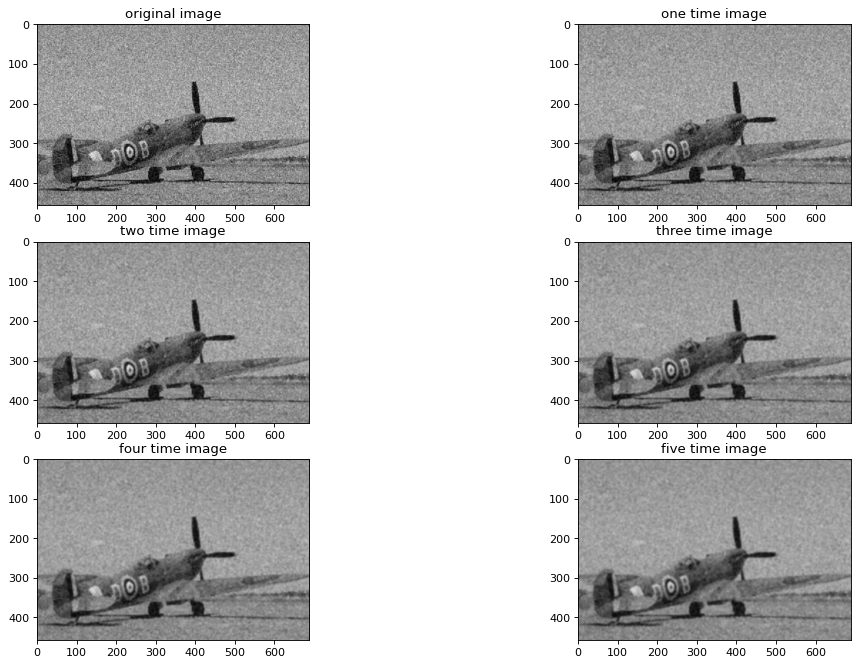

In [78]:

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

# Reading
img10 = plt.imread('1.png')

fig = plt.figure(figsize=(16, 10), dpi=80)
(ax1, ax2), (ax3, ax4), (ax5, ax6) = fig.subplots(3, 2)

filter1 = np.ones((3, 3)) / 9

im1 = cv2.filter2D(src=img10, ddepth=-1, kernel=filter1)

ax1.imshow(img10, cmap='gray')
ax1.set_title('original image')

ax2.imshow(im1, cmap='gray')
ax2.set_title('one time image')

im1 = cv2.filter2D(src=im1, ddepth=-1, kernel=filter1)
ax3.imshow(im1, cmap='gray')
ax3.set_title('two time image')

im1 = cv2.filter2D(src=im1, ddepth=-1, kernel=filter1)
ax4.imshow(im1, cmap='gray')
ax4.set_title('three time image')

im1 = cv2.filter2D(src=im1, ddepth=-1, kernel=filter1)
ax5.imshow(im1, cmap='gray')
ax5.set_title('four time image')

im1 = cv2.filter2D(src=im1, ddepth=-1, kernel=filter1)
ax6.imshow(im1, cmap='gray')
ax6.set_title('five time image')


Text(0.5, 1.0, 'median image (two time)')

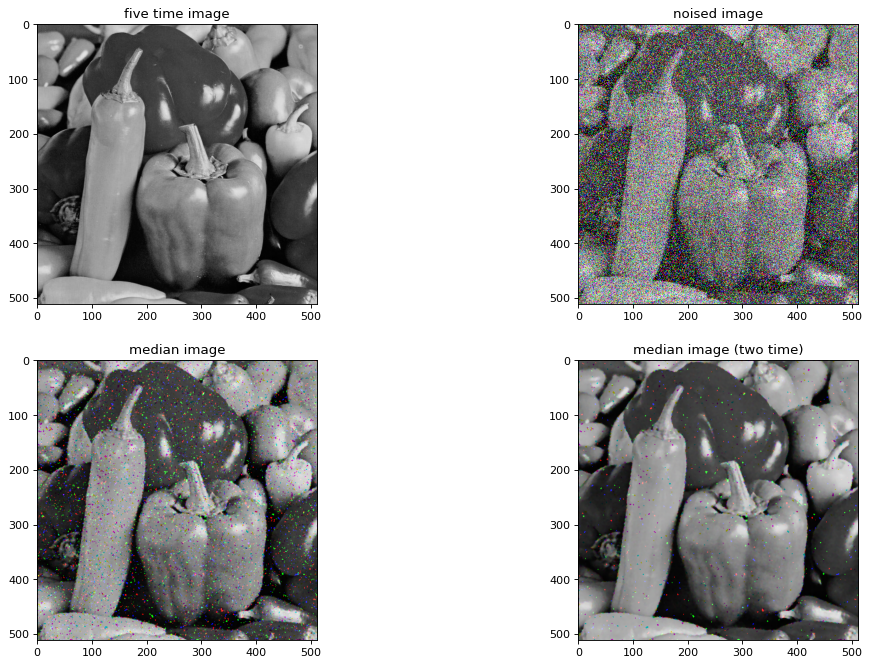

In [97]:

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

# Reading
img11 = plt.imread('pepper.jpg')

fig = plt.figure(figsize=(16, 10), dpi=80)
(ax1, ax2), (ax3, ax4) = fig.subplots(2, 2)

ax1.imshow(img11, cmap='gray')
ax1.set_title('five time image')

# in question, it was asked to use 0.2 as amount, but to see the result better,
# i used 0.4 to see a better result
noisy = random_noise(img11, mode='s&p', amount=0.4).astype('float32')

ax2.imshow(noisy, cmap='gray')
ax2.set_title('noised image')

median = cv2.medianBlur(src=noisy, ksize=3)
ax3.imshow(median, cmap='gray')
ax3.set_title('median image')

median2 = cv2.medianBlur(src=median, ksize=3)
ax4.imshow(median2, cmap='gray')
ax4.set_title('median image (two time)')

# in this one, also we can see the diffrences of how multiple use of median
# filter can severely reduce the amount of noise placed in the image
